In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import strategy_simulator as ss

import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
import utils

from openbb import obb
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)

#change aspect of plot
plt.rcParams['figure.figsize'] = [10, 3]


### Load and process data

In [3]:
# for local crypto data
# price_data = pd.read_csv(os.path.join('..', 'data', 'scraped_OHLC_10-23-2024', 'BTCUSD.csv'))

# price_data['dtime'] = pd.to_datetime(price_data['dtime'], format='%Y-%m-%d %H:%M:%S')
# price_data.set_index('dtime', inplace = True)
# price_data.dropna(inplace = True)

# for obb data
price_data = obb.equity.price.historical(symbol="spy", provider="yfinance", start_date="2005-01-02", interval='1d').to_df()
price_data.dropna(inplace = True)


# price_data = pd.read_pickle(os.path.join('..', 'data', 'SOL', "SOLUSD_price-volume_minute.pickle"))
# price_data

#drop all data prior to 07, 2022
# price_data = price_data.loc[price_data.index >= pd.to_datetime('2022-09-01 00:00:00')]

price_data 

,open,high,low,close,volume,dividend
date,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,55748000,0.0
2005-01-04,120.459999,120.540001,118.440002,118.830002,69167600,0.0
2005-01-05,118.739998,119.250000,118.000000,118.010002,65667300,0.0
2005-01-06,118.440002,119.150002,118.260002,118.610001,47814700,0.0
2005-01-07,118.970001,119.230003,118.129997,118.440002,55847700,0.0
...,...,...,...,...,...,...
2025-01-27,594.809998,599.690002,594.640015,599.369995,70361100,0.0
2025-01-28,600.619995,605.369995,597.250000,604.520020,44433300,0.0
2025-01-29,603.719971,604.130005,599.219971,601.809998,37177400,0.0


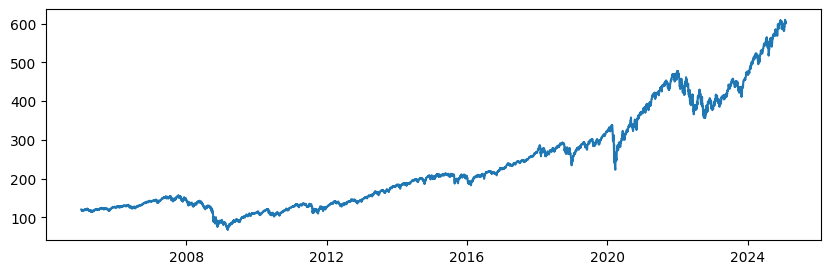

In [4]:
plt.plot(price_data['close'])
plt.show()

# resample
# price_data = utils.ohlc_resampler(price_data, '24h')
# plt.plot(price_data['open'])
# plt.show()

In [5]:
# x_new = [price_data['open'].iloc[0]]
# for i in range(len(price_data) - 1):
#     price = price_data['open'].iloc[i+1]
#     x_new.append(ss.exponential_moving_average(price, x_new[-1], 0.005))

# price_data['mean'] = x_new
# fig = px.line(price_data, y=['open', 'mean'])
# fig.show()



### Test strategies using trade simulator

If all money was invested at day 0:


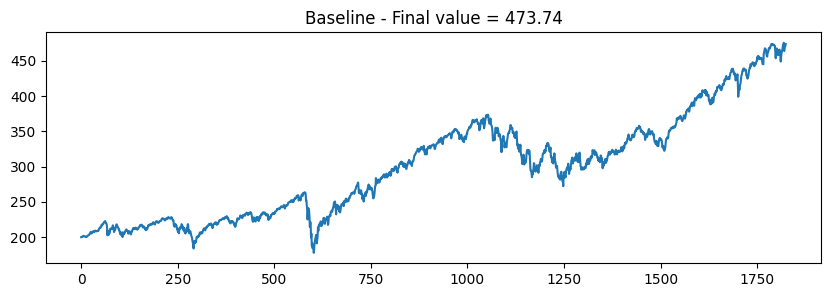

Reserve: 381.2989614196156
Invested: 0.0
Total: 381.2989614196156
Baseline: 473.7396164140234


numer of trades made: 6


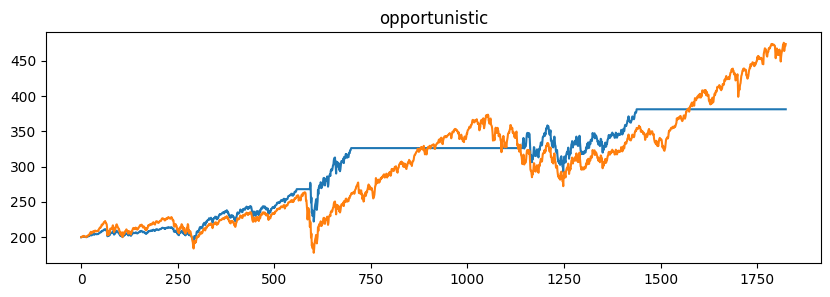

Reserve: 0.0
Invested: 491.01138161009396
Total: 491.01138161009396
Baseline: 473.7396164140234


numer of trades made: 1


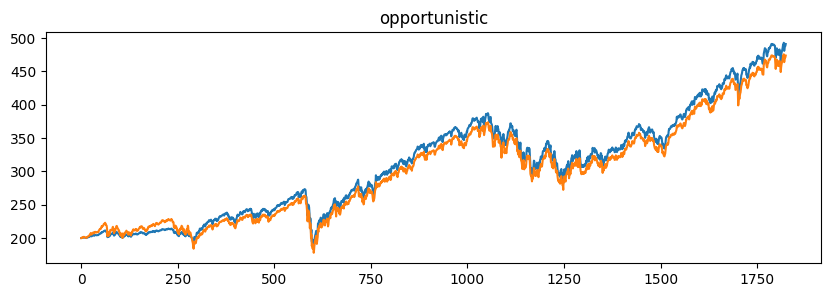

Reserve: 0.0
Invested: 447.2958471101041
Total: 447.2958471101041
Baseline: 473.7396164140234


numer of trades made: 1


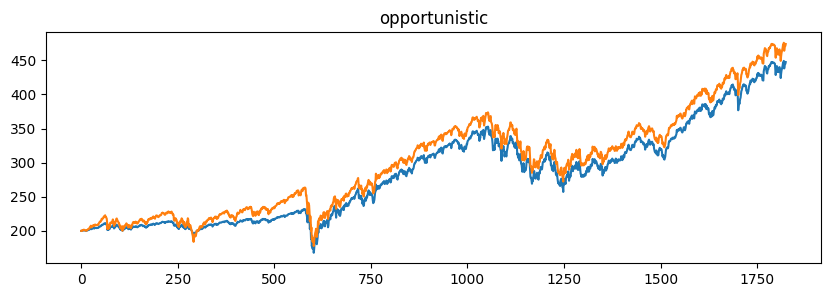

Reserve: 0.0
Invested: 474.1744957070107
Total: 474.1744957070107
Baseline: 473.7396164140234


numer of trades made: 1


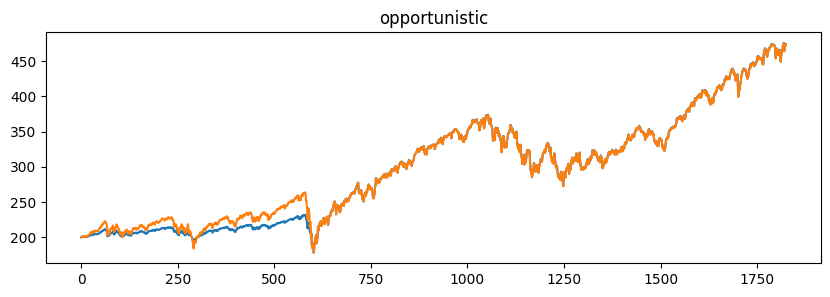

: 

In [9]:
last_n = 365*5 # len(price_data)

strategies = [
    # ss.hodl()
    # ss.DCA(period = last_n/10, amount = 10)
    # ,ss.randomDCA(period = last_n/10, amount = 10)
    # ,ss.percentage_from_mean(avg_start = price_data['open'].iloc[-last_n])
    # ,ss.maintain_investment()
    # ,ss.slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 1000)
    # ,ss.inverse_slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 1000)
    
    # ,ss.slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 10)
    # ,ss.inverse_slow_fast_avg(avg_start = price_data['open'].iloc[-last_n], beta_slow = 0.1, beta_fast = 0.3, trade_amount = 10)
    
    # ,ss.avg_derivitive(avg_start = price_data['open'].iloc[-last_n], beta = 0.1)
    # ,ss.momentum(trade_amount = .1,trade_cap=1 )
    # ,ss.inverse_momentum(trade_amount = .1,trade_cap=1 ),
    # ss.copy_last(),
    # ss.decorrelation_time_copy_last(),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 25, window = 100),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 100, window = 500),
    
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 10, window = 40),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 20, window = 40),
    # ss.decorrelation_time_copy_last(amount=50, decor_time_thresh = 10, window = 50),
    # ss.copy_last_all_in(),
    # ss.copy_last(amount = 99999),
    
    # ss.ema_slope(beta=.01),
    # ss.dynamic_ema_slope(beta_factor=.01),
    # ss.ema_accel(beta = 0.1, factor = .1),
    # ss.ema_accel(beta = 0.1, factor = .5),
    # ss.ema_accel(beta = 0.1, factor = 1),
    
    # ss.percentage_from_mean(avg_start = 0, beta = 0.2, limit_percent = .10, thresh_percent = .01, adjust = .5), 
    # ss.percentage_from_mean_simple(beta = 0.1, thresh_percent = .005, trade_percent = 1, trade_amount = 10),
    # ss.percentage_from_mean_simple(beta = 0.1, thresh_percent = .01, trade_percent = 1, trade_amount = 10),
    # ss.threshold_buy_sell(threshold_up = 0.01, trade_percent_up = 10, trade_amount_up = 10, threshold_down = 0.01, trade_percent_down = 10, trade_amount_down = 10),
    # ss.threshold_buy_sell(threshold_up = 0.05, trade_percent_up = 10, trade_amount_up = 10, threshold_down = 0.05, trade_percent_down = 10, trade_amount_down = 10),
    # ss.ema_slope_reversal(beta = 0.1),
    # ss.ema_slope_reversal(beta = 0.2),
    # ss.ema_slope_reversal(beta = 0.3),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 40),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 20, window = 40),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 100), ###
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 10, window = 100),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 5, window = 200),
    # ss.decorrelation_time_copy_last_all_in(decor_time_thresh = 10, window = 200),
    
    ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.01, thresh_percent = .1, trade_amount = 999)
    ,ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.05, thresh_percent = .1, trade_amount = 999)
    ,ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.1, thresh_percent = .1, trade_amount = 999)
    ,ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.15, thresh_percent = .1, trade_amount = 999)
    
    
]

print('If all money was invested at day 0:')
plt.plot(price_data[-last_n:]['open'].reset_index(drop = True) * 200 / price_data['open'].iloc[-last_n])
plt.title(f"Baseline - Final value = {np.round(price_data['open'].iloc[-1] / price_data['open'].iloc[-last_n] * 200, 2)}")
plt.show()

for s in strategies:
    sim = ss.trade_simulator(price_data[-last_n:]['open'].reset_index(drop = True), 
                             initial_invested = 100, 
                             initial_reserve = 100, 
                             trade_cost = 0.00, 
                             trade_cost_percent = 0)
    sim.run(s)
    # plt.plot(sim.invested_ot)
    plt.plot(np.array(sim.invested_ot)+np.array(sim.reserve_ot))
    plt.plot(sim.baselines)
    plt.title(s.__class__.__name__)
    print(f"numer of trades made: {np.sum(np.array(sim.trades) != 0)}")
    plt.show()

In [ ]:
last_n = len(price_data)

strategies = [
    ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.05, thresh_percent = .05, trade_amount = 1)
    , ss.opportunistic(avg_start = price_data['open'].iloc[-last_n], beta = 0.005, thresh_percent = .04, trade_amount = 1)
]

for s in strategies:
    print(s.__class__.__name__)
    print(s.__dict__)
    sim = ss.trade_simulator(price_data[-last_n:]['open'].reset_index(drop = True))
    sim.run(s)

opportunistic
{'avg': 41040.3, 'avg_ot': [], 'beta': 0.05, 'thresh_percent': 0.05, 'trade_amount': 1}
Reserve: 38
Invested: 136.79573883192518
Total: 174.79573883192518
Baseline: 160.02441502620593


opportunistic
{'avg': 41040.3, 'avg_ot': [], 'beta': 0.005, 'thresh_percent': 0.04, 'trade_amount': 1}
Reserve: 160.21584740795805
Invested: 0.0
Total: 160.21584740795805
Baseline: 160.02441502620593


